In [1]:
import warnings 
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../')
import database as db
from scripts import notebook_utils as nu

In [2]:
connection = db.get_connection()

In [3]:
cursor = connection.cursor()

In [4]:
sql = 'SELECT card_type, count(*) as total FROM cards WHERE NOT card_type = "None" GROUP BY card_type '

In [5]:
cursor.execute(sql)
data = cursor.fetchall()

In [6]:
labels,values = nu.get_labels_and_values(data)

<BarContainer object of 5 artists>

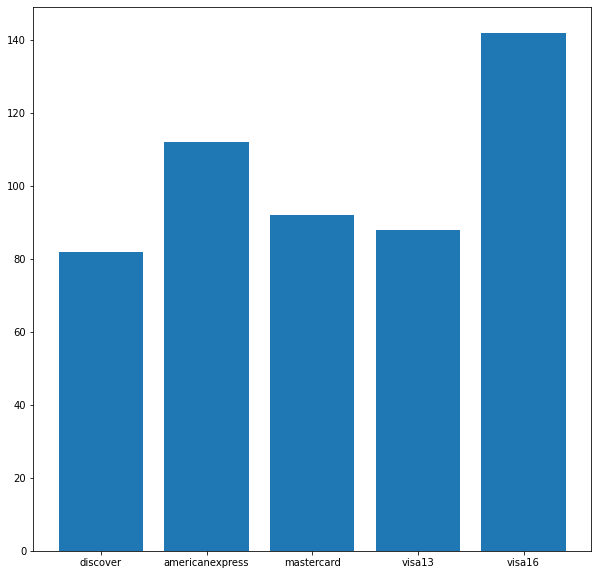

In [7]:
plt.figure(figsize=(10,10))
plt.bar(labels, values)

([<matplotlib.patches.Wedge at 0x11565bac0>,
 [Text(0.9657385224588101, 0.5266394461480023, 'discover'),
  Text(-0.1203083351674987, 1.0934010721090524, 'americanexpress'),
  Text(-1.0736834627076814, 0.23917320482872434, 'mastercard'),
  Text(-0.7036403264762645, -0.8455118514582609, 'visa13'),
  Text(0.7138835089586981, -0.8368813151438002, 'visa16')])

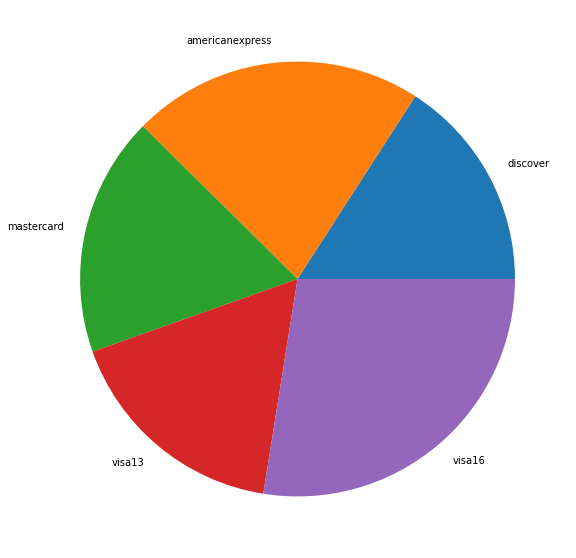

In [8]:
plt.figure(figsize=(10,10))
plt.pie(values,labels=labels)

In [9]:
sql = 'SELECT card_type as card, count(*) as total FROM cards WHERE NOT card_type = "None"'
cursor.execute(sql)
cards = cursor.fetchall()
sql = 'SELECT card_type as cash, count(*) as total FROM cards WHERE card_type = "None"'
cursor.execute(sql)
cash = cursor.fetchall()

In [10]:
labels,values = nu.get_card_vs_cash(cards,cash)

([<matplotlib.patches.Wedge at 0x1156bba90>,
 [Text(-0.037662052785842656, 1.0993550699296186, 'cash'),
  Text(0.03766215571489261, -1.099355066403438, 'card')])

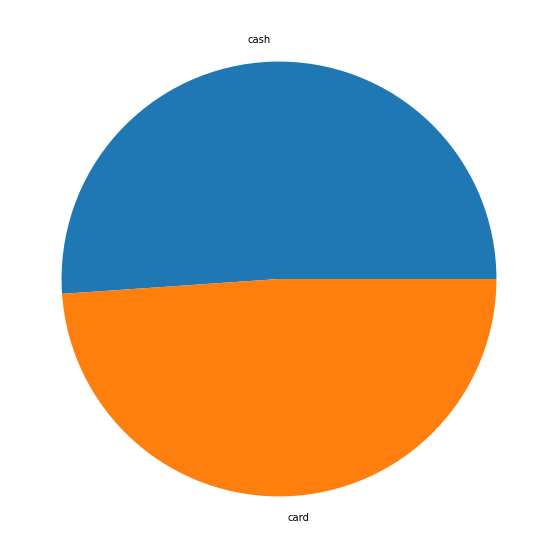

In [11]:
plt.figure(figsize=(10,10))
plt.pie(values,labels=labels)

In [ ]:
cursor.close()
connection.close()